<a href="https://colab.research.google.com/github/patrick-lai/machine-learning-excercises/blob/master/tf_eager_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import numpy as np
tfe = tf.contrib.eager
tf.enable_eager_execution()

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
    self.dense1 = tf.keras.layers.Dense(units=2)
#     self.dense2 = tf.keras.layers.Dense(units=10)

  def call(self, input):
    """Run the model."""
    result = self.dense1(input)
#     result = self.dense2(result)
#     result = self.dense2(result)  # reuse variables from dense2 layer
    return result

model = MNISTModel()

In [0]:
data = tf.constant([
    [1]
])
output = model(data)
print(output)

tf.Tensor([[-1  0]], shape=(1, 2), dtype=int32)


In [0]:
model.weights

[<tf.Variable 'mnist_model_3/dense_4/kernel:0' shape=(1, 2) dtype=int32, numpy=array([[-1,  0]], dtype=int32)>,
 <tf.Variable 'mnist_model_3/dense_4/bias:0' shape=(2,) dtype=int32, numpy=array([0, 0], dtype=int32)>]

In [0]:
model = MNISTModel()
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

In [0]:

data = tf.constant([[1., 1.], [2., 2.]])
label = tf.constant([[5., -5.], [10., -10.]])

model(data)
print("weights before training:", model.weights)
for i in range(3000):
  with tf.GradientTape() as tape:
    output = model(data)
    loss_value = tf.reduce_mean((label - output) ** 2)
#     print("output", output.numpy(), "loss_value", loss_value.numpy())
  grads = tape.gradient(loss_value, model.variables)
#   print("grads", grads)
  optimizer.apply_gradients(zip(grads, model.variables),
                              global_step=tf.train.get_or_create_global_step())

print("output after training", model(data))
print("loss", loss_value.numpy())
print("weights after training:", model.weights)

weights before training: [<tf.Variable 'mnist_model_38/dense_48/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.0391092, -1.896043 ],
       [ 1.6553326, -2.7063062]], dtype=float32)>, <tf.Variable 'mnist_model_38/dense_48/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.5006547, -0.6515475], dtype=float32)>]
output after training tf.Tensor(
[[ 5.015436 -5.02009 ]
 [ 9.991259 -9.988625]], shape=(2, 2), dtype=float32)
loss 0.00021227551
weights after training: [<tf.Variable 'mnist_model_38/dense_48/kernel:0' shape=(2, 2) dtype=float32, numpy=
array([[ 3.1797953, -2.0791366],
       [ 1.7960275, -2.8893976]], dtype=float32)>, <tf.Variable 'mnist_model_38/dense_48/bias:0' shape=(2,) dtype=float32, numpy=array([ 0.03961316, -0.05155562], dtype=float32)>]


# Let's try it on MNIST data

In [0]:
# Fetch and format the mnist data
(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
print(mnist_labels.shape)

(60000,)


In [0]:
import matplotlib.pyplot as plt

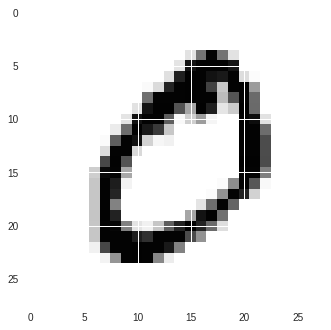

In [0]:
plt.imshow(mnist_images[1])

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super(MNISTModel, self).__init__()
#     self.dense1 = tf.keras.layers.Dense(units=10)
#     self.dense2 = tf.keras.layers.Dense(units=10)
#       tf.keras.layers.Conv2D(10,[3,3], activation='relu')
      self.dense1 = tf.keras.layers.Dense(units=10)

  def call(self, input):
    """Run the model."""
#     print(input.shape)
    input = tf.reshape(input, (input.shape[0], -1))
#     print(input.shape)
    result = self.dense1(input)
#     result = self.dense2(result)
#     result = self.dense2(result)  # reuse variables from dense2 layer
    return result

In [0]:


mnist_model = MNISTModel()

for images,labels in dataset.take(1):
  print(images[0:1].shape)
  logits = mnist_model(images[0:1]).numpy()
  print("Logits: ", logits.shape, logits)
#   print("probabilities", tf.nn.softmax(logits))

optimizer = tf.train.AdamOptimizer()

loss_history = []

for (batch, (images, labels)) in enumerate(dataset.take(400)):
  if batch % 80 == 0:
    print()
  print('.', end='')
  with tf.GradientTape() as tape:
    logits = mnist_model(images)
    loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

  loss_history.append(loss_value.numpy())
  grads = tape.gradient(loss_value, mnist_model.variables)
  optimizer.apply_gradients(zip(grads, mnist_model.variables),
                            global_step=tf.train.get_or_create_global_step())

(1, 28, 28, 1)
Logits:  (1, 10) [[ 0.3844425   0.62241435  0.21380556  0.24257356 -0.25161266  0.57992905
   0.0861415   0.1174711   0.6501667   0.37367207]]

................................................................................
................................................................................
................................................................................
................................................................................
................................................................................

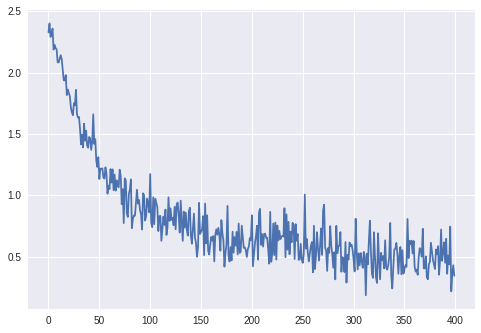

In [0]:
plt.plot(loss_history)

(1, 28, 28, 1)
Logits:  (1, 10) [[ 4.037184   -8.73653     0.01391749 -1.8983408  -7.009024   -0.6096395
  -4.5864954  -4.064028   -0.43684003 -4.858221  ]]
probabilities tf.Tensor(
[[9.5953596e-01 2.7196170e-06 1.7170340e-02 2.5368554e-03 1.5302216e-05
  9.2038922e-03 1.7252220e-04 2.9090405e-04 1.0940001e-02 1.3147283e-04]], shape=(1, 10), dtype=float32)


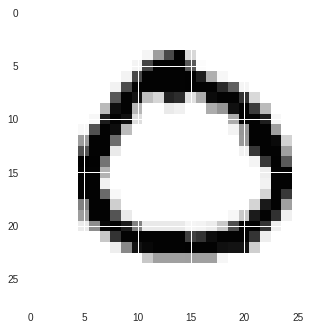

In [0]:

for images,labels in dataset.take(1):
  print(images[0:1].shape)
  plt.imshow(np.squeeze(images[0:1], axis=0))
  logits = mnist_model(images[0:1]).numpy()
  print("Logits: ", logits.shape, logits)
  print("probabilities", tf.nn.softmax(logits))

# Let's try multiple layers of convolution

In [0]:
# Fetch and format the mnist data
# (cifar_images, cifar_labels), _ = tf.keras.datasets.cifar10.load_data()

# dataset = tf.data.Dataset.from_tensor_slices(
#   (tf.cast(cifar_images/255, tf.float32),
#    tf.cast(cifar_labels,tf.int64)))
# dataset = dataset.shuffle(1000).batch(32)

(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = tf.keras.layers.Conv2D(10,[3,3], strides=(1, 1), padding='same', activation='relu')
    self.conv2 = tf.keras.layers.Conv2D(8,[3,3], strides=(2, 2), padding='same', activation='relu')
    self.dense1 = tf.keras.layers.Dense(units=10)

  def call(self, input):
    """Run the model."""
    result = self.conv1(input)
#     print(result.shape)
    result = self.conv2(result)
#     print(result.shape)
    result = tf.reshape(result, (result.shape[0], -1))
    result = self.dense1(result)
    return result

  def get_layers(self, input):
    conv1 = self.conv1(input)
    conv2 = self.conv2(conv1)
    return [conv1.numpy(), conv2.numpy()]

mnist_model = MNISTModel()

for images,labels in dataset.take(1):
  print(images[0:1].shape)
  logits = mnist_model(images[0:1]).numpy()
  probability = tf.nn.softmax(logits)
  print("probability:", tf.round(probability * 100))

(1, 28, 28, 1)
probability: tf.Tensor([[10. 10. 10. 10. 10. 10. 10. 10. 10. 10.]], shape=(1, 10), dtype=float32)


In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

for (batch, (images, labels)) in enumerate(dataset.take(400)):
  if batch % 80 == 0:
    print()
  print('.', end='')
  with tf.GradientTape() as tape:
    logits = mnist_model(images)
    loss_value = tf.losses.sparse_softmax_cross_entropy(labels, logits)

  grads = tape.gradient(loss_value, mnist_model.variables)
  optimizer.apply_gradients(zip(grads, mnist_model.variables),
                            global_step=tf.train.get_or_create_global_step())


................................................................................
................................................................................
................................................................................
................................................................................
................................................................................

tf.Tensor([[  0.   0.   0.   0. 100.   0.   0.   0.   0.   0.]], shape=(1, 10), dtype=float32)
best guess: 4


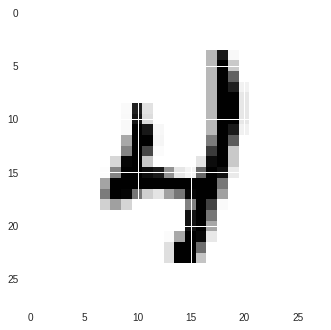

In [0]:
for images,labels in dataset.take(1):
  plt.imshow(np.squeeze(images[0], axis=0))
  logits = mnist_model(images[0:1]).numpy()
  probability = tf.nn.softmax(logits)
  print(tf.round(probability * 100))
  print("best guess:", np.argmax(probability.numpy()))
  conv1, conv2 = mnist_model.get_layers(images[0:1])

(1, 28, 28, 10)


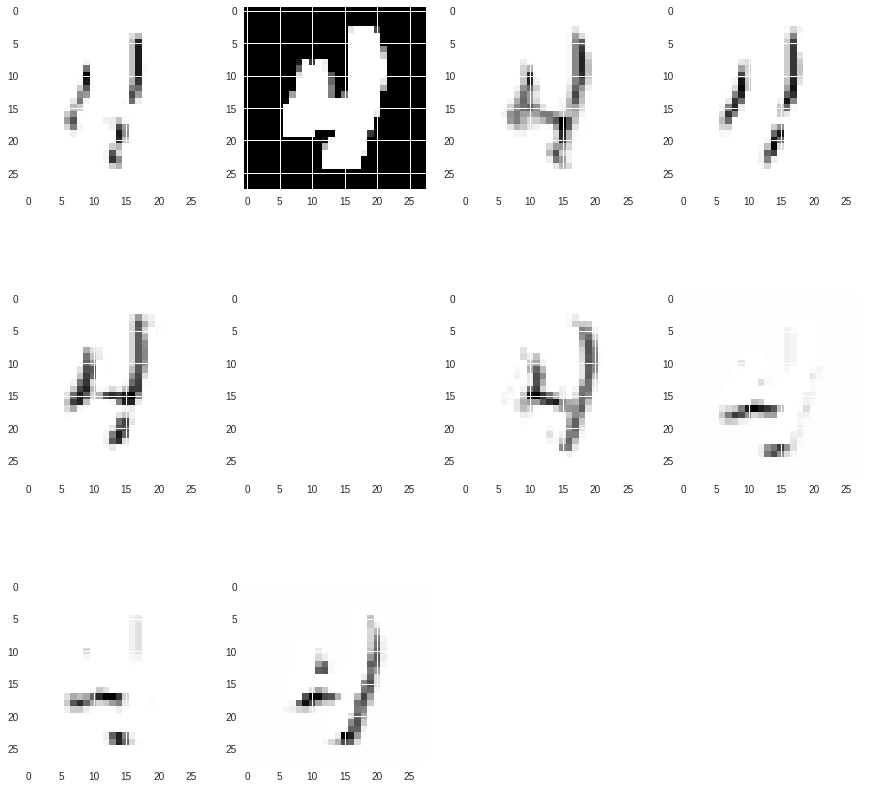

In [0]:
import math
conv_layer = conv1
print(conv_layer.shape)
plt.figure(figsize=(15,15))
columns = 4
count = conv_layer.shape[3]
rows = math.ceil(1.0 * count / columns)
for i in range(count):
  plt.subplot(rows, columns, i + 1)
  plt.imshow(conv_layer[0, :, :, i])

plt.show()

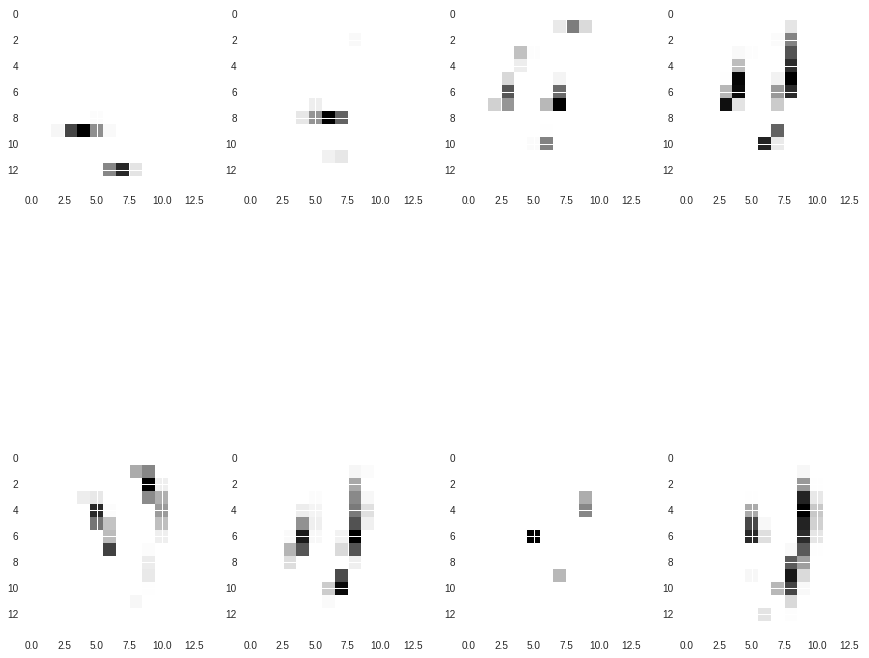

In [0]:
conv_layer = conv2

plt.figure(figsize=(15,15))
columns = 4
count = conv_layer.shape[3]
rows = math.ceil(1.0 * count / columns)
for i in range(count):
  plt.subplot(rows, columns, i + 1)
  plt.imshow(conv_layer[0, :, :, i])

plt.show()

# Directly estimate the number instead of output probabilities

In [0]:

(mnist_images, mnist_labels), _ = tf.keras.datasets.mnist.load_data()

dataset = tf.data.Dataset.from_tensor_slices(
  (tf.cast(mnist_images[...,tf.newaxis]/255, tf.float32),
   tf.cast(mnist_labels,tf.int64)))
dataset = dataset.shuffle(1000).batch(32)

In [0]:
class MNISTModel(tf.keras.Model):
  def __init__(self):
    super().__init__()
    self.conv1 = tf.keras.layers.Conv2D(10,[3,3], strides=(1, 1), padding='same', activation='relu')
    self.conv2 = tf.keras.layers.Conv2D(8,[3,3], strides=(2, 2), padding='same', activation='relu')
    self.dense1 = tf.keras.layers.Dense(units=1)

  def call(self, input):
    """Run the model."""
    result = self.conv1(input)
#     print(result.shape)
    result = self.conv2(result)
#     print(result.shape)
    result = tf.reshape(result, (result.shape[0], -1))
    result = self.dense1(result)
    return result

  def get_layers(self, input):
    conv1 = self.conv1(input)
    conv2 = self.conv2(conv1)
    return [conv1.numpy(), conv2.numpy()]

mnist_model = MNISTModel()

for images,labels in dataset.take(1):
  print(images[0:1].shape)
  logits = mnist_model(images[0:1]).numpy()
  print("Guess:", logits)

(1, 28, 28, 1)
Guess: [[0.05441934]]


(1, 28, 28, 1)
Guess: [[-0.15766963]]
tf.Tensor([3], shape=(1,), dtype=int64) tf.Tensor([[9]], shape=(1, 1), dtype=int64)


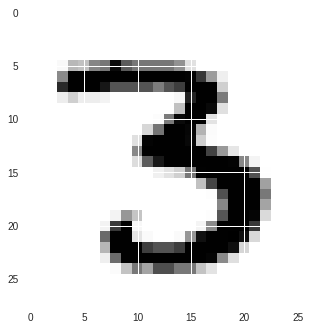

In [0]:
for images,labels in dataset.take(1):
  print(images[0:1].shape)
  plt.imshow(np.squeeze(images[0], axis=0))
  logits = mnist_model(images[0:1]).numpy()
  print("Guess:", logits)
  loss_value = (labels[0:1] - logits)**2
  print(labels[0:1], loss_value)

In [0]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)

loss_history = []
for i in range(3): 
  for (batch, (images, labels)) in enumerate(dataset.take(400)):
#     if batch % 80 == 0:
#       print()
#     print('.', end='')
    with tf.GradientTape() as tape:
      logits = mnist_model(images)
      loss_value = tf.reduce_mean((tf.cast(labels, tf.float32)-5. - logits)**2)
    
    loss_history.append(loss_value.numpy())
    grads = tape.gradient(loss_value, mnist_model.variables)
    optimizer.apply_gradients(zip(grads, mnist_model.variables),
                              global_step=tf.train.get_or_create_global_step())

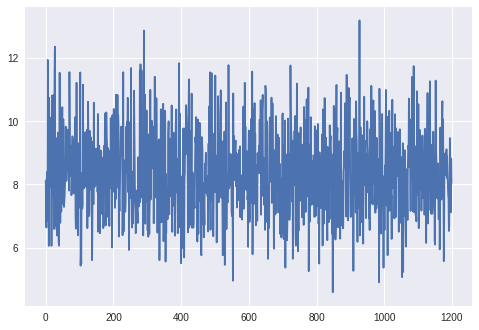

In [0]:
plt.plot(loss_history)

Label: tf.Tensor(6, shape=(), dtype=int64)  Logits: [[-0.53693867]]


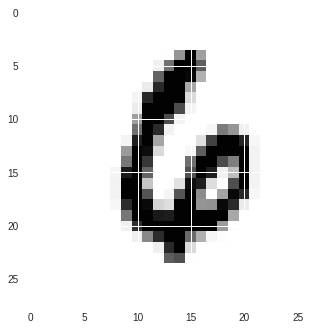

In [0]:
for images,labels in dataset.take(1):
  plt.imshow(np.squeeze(images[0], axis=0))
  logits = mnist_model(images[0:1]).numpy()
  print("Label:", labels[0], " Logits:", logits)